# EDA and Stakeholder Questions Notebook

In [35]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [36]:
# read in the processed data
df = pd.read_csv('../data/train_processed_labeled.csv')
print(df.shape)
df.head(3)

(57565, 45)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,source_type,source_class,waterpoint_type,waterpoint_type_group,recorded_year,waterpoint_age,region_code_and_name,recorded_good_quality,recorded_good_quantity,status_group
0,69572,"6,000.00",2011-03-14,roman,1390,Roman,34.94,-9.86,none,lake nyasa,...,spring,groundwater,communal standpipe,communal standpipe,2011,12,iringa_11,True,True,functional
1,8776,0.00,2013-03-06,grumeti,1399,GRUMETI,34.70,-2.15,zahanati,lake victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,mara_20,True,False,functional
2,34310,25.00,2013-02-25,lottery club,686,World vision,37.46,-3.82,kwa mahundi,pangani,...,dam,surface,communal standpipe multiple,communal standpipe,2013,4,manyara_21,True,True,functional


# Processed Data Column Descriptions

* id - Numeric identifer for the waterpoint
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location,  NOTE: Hierarchy is Region > LGA > Ward
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
* recorded_year -  Pulling out the year from date_recorded
* waterpoint_age - Calculate as recorded_year - construction_year
* region_with_code - Combine region and region_code. There are more region_code values than region values
* recorded_good_quality - True if quality_group == 'good', False if anything other than 'good'
* recorded_good_quantity - True if quanity_group == 'sufficient', False if anythign other than 'sufficient'
* status_group - Operational status (these are the 3 classes we will attempt to predict on Test data)
 
 

### Get basic info on waterpoint Operational Status


Text(0, 0.5, 'Waterpoints')

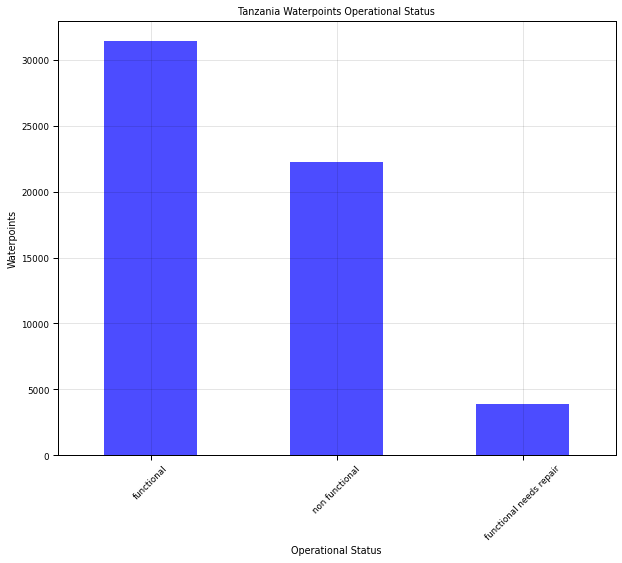

In [37]:
by_op_status = df.groupby('status_group')['id'].count()
by_op_status.sort_values(ascending=False, inplace=True)
fig = plt.figure(figsize = (10, 8))
by_op_status.plot.bar(rot=45, alpha = 0.70, color='blue', title='Tanzania Waterpoints Operational Status')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Operational Status')
plt.ylabel('Waterpoints')

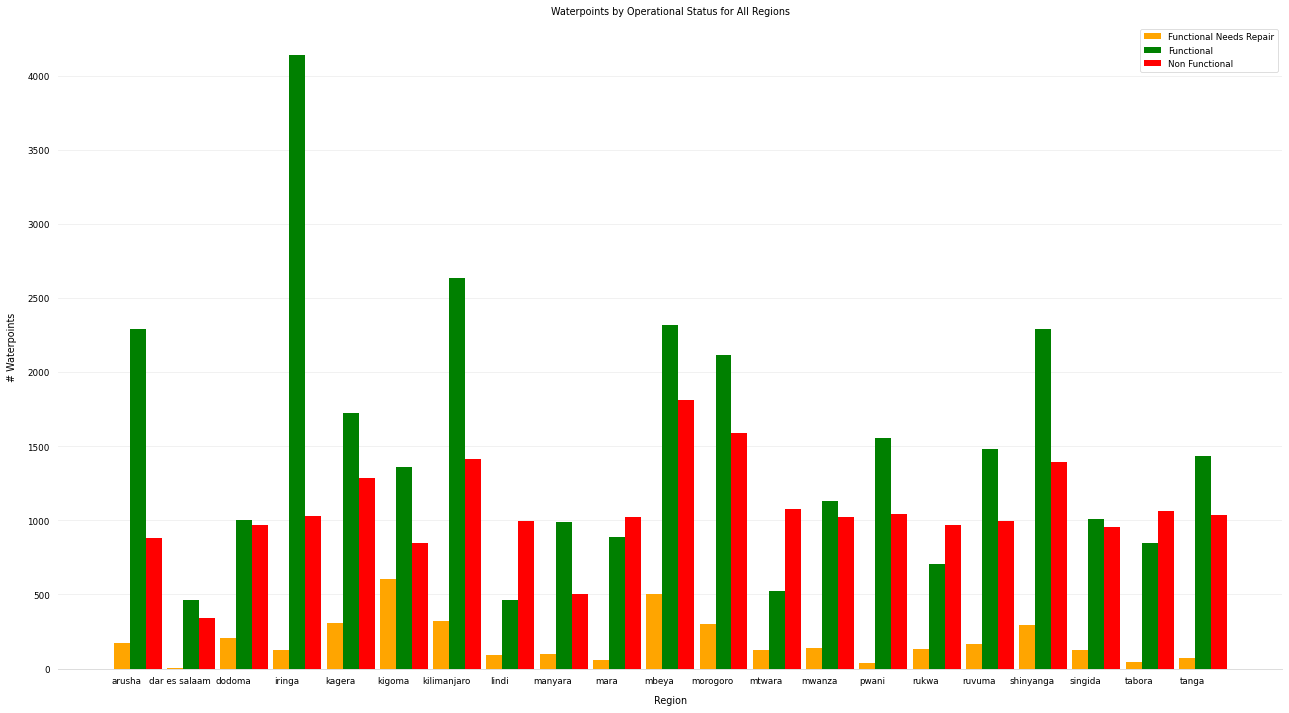

In [38]:
# Use Seaborn's context settings to make fonts larger.
sns.set_context('paper')

# Create a grouped bar chart, with region as the x-axis and status_group as the variable we're grouping on
fig, ax = plt.subplots(figsize=(18, 10))

# Our x-axis. We just want a list of numbers from zero with a value for each of the regions.
x = np.arange(len(df.region.unique()))

# Define bar width. We need this to offset the additional bars.
bar_width = 0.3

b1_series = df[df['status_group'] == 'functional needs repair'].groupby('region')['id'].count().sort_index()
b2_series = df[df['status_group'] == 'functional'].groupby('region')['id'].count().sort_index()
b3_series = df[df['status_group'] == 'non functional'].groupby('region')['id'].count().sort_index()

b1 = ax.bar(x, b1_series, width=bar_width, label='Functional Needs Repair', color='orange')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, b2_series, width=bar_width, label='Functional', color='green')
 # Same thing, but offset the x again
b3 = ax.bar(x +(bar_width*2), b3_series, width=bar_width, label='Non Functional', color='red')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 3)
ax.set_xticklabels(b1_series.index)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=10)
ax.set_ylabel('# Waterpoints', labelpad=10)
ax.set_title('Waterpoints by Operational Status for All Regions', pad=10)
fig.tight_layout()


In [39]:
functional_by_region_quality = df[df['status_group'] != 'non functional'].groupby(['region', 'recorded_good_quality'])['id'].count()

functional_by_region_qantity = df[df['status_group'] != 'non functional'].groupby(['region', 'recorded_good_quantity'])['id'].count()

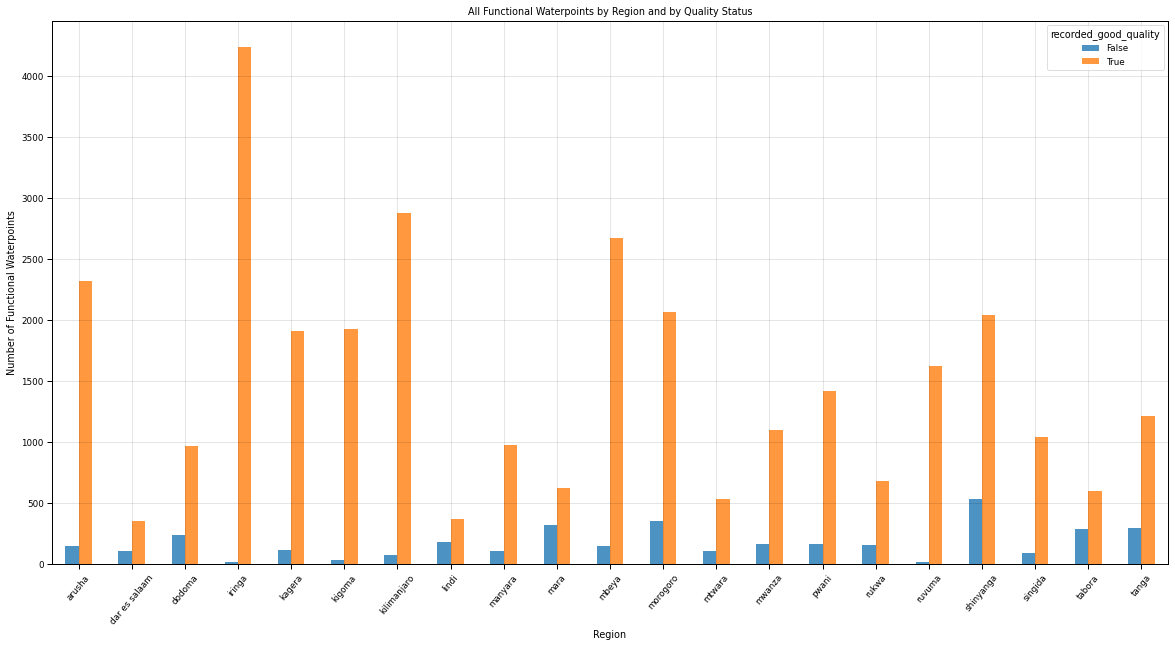

In [42]:
functional_by_region_quality.unstack().plot.bar(rot=50, alpha = 0.80, figsize=(20,10), title='All Functional Waterpoints by Region and by Quality Status')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Region')
plt.ylabel('Number of Functional Waterpoints')
plt.show()

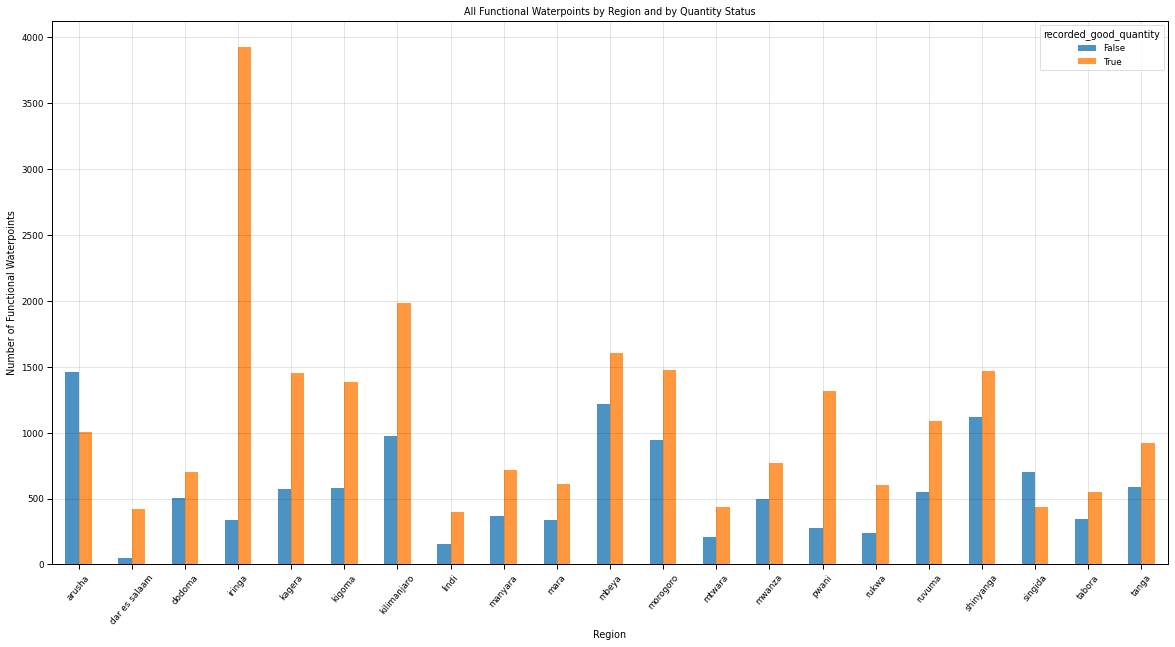

In [43]:
functional_by_region_qantity.unstack().plot.bar(rot=50, alpha = 0.80, figsize=(20,10), title='All Functional Waterpoints by Region and by Quantity Status')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.xlabel('Region')
plt.ylabel('Number of Functional Waterpoints')
plt.show()

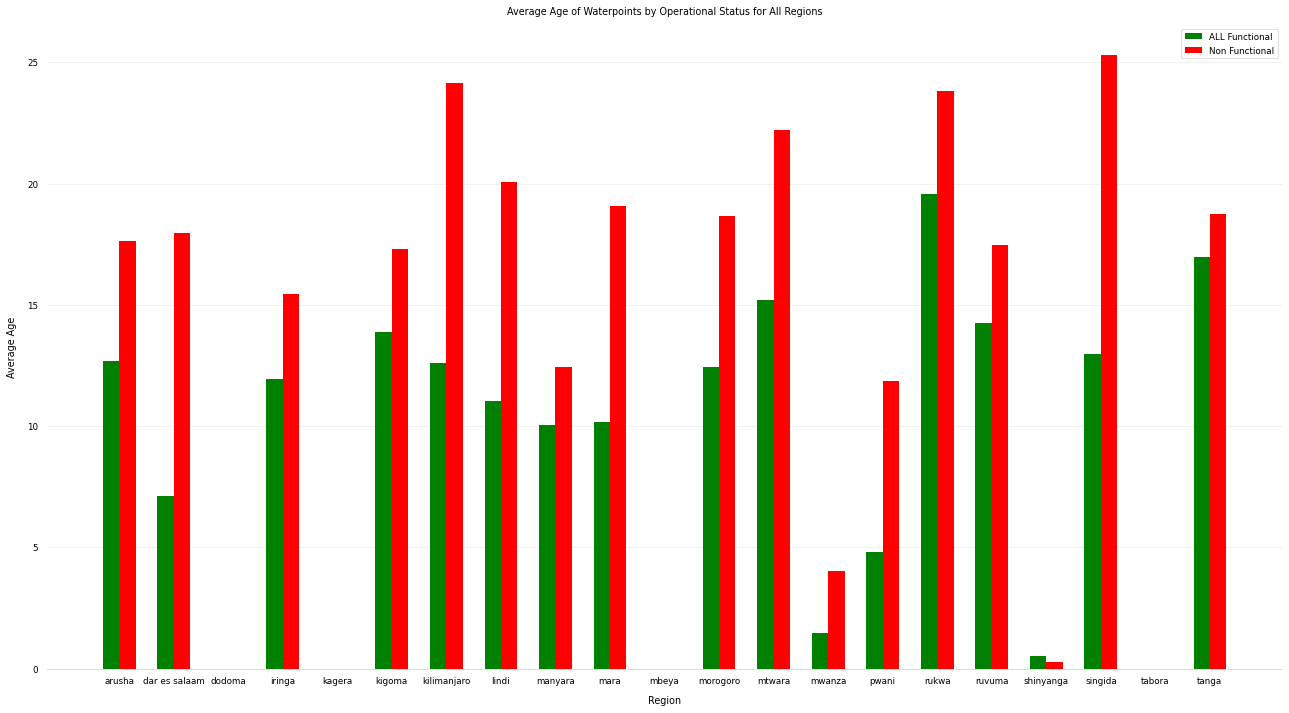

In [49]:

# Create a grouped bar chart, with region as the x-axis and status_group as the variable we're grouping on
fig, ax = plt.subplots(figsize=(18, 10))

# Our x-axis. We just want a list of numbers from zero with a value for each of the regions.
x = np.arange(len(df.region.unique()))

# Define bar width. We need this to offset the additional bars.
bar_width = 0.3

b1_series = df[df['status_group'] != 'non functional'].groupby('region')['waterpoint_age'].mean().sort_index()
b2_series = df[df['status_group'] == 'non functional'].groupby('region')['waterpoint_age'].mean().sort_index()

b1 = ax.bar(x, b1_series, width=bar_width, label='ALL Functional', color='green')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, b2_series, width=bar_width, label='Non Functional', color='red')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(b1_series.index)

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=10)
ax.set_ylabel('Average Age', labelpad=10)
ax.set_title('Average Age of Waterpoints by Operational Status for All Regions', pad=10)
fig.tight_layout()

<AxesSubplot:xlabel='population'>

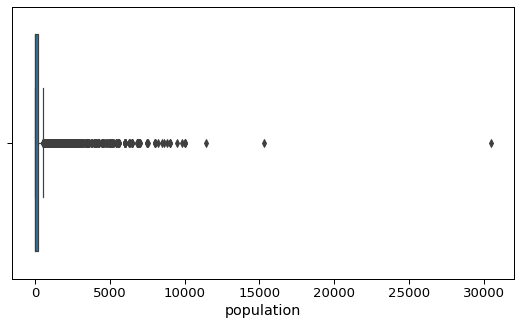

In [53]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x=df['population'])

### What is the breakdown of waterpoint operational status by Region?

### For Functioning (and Needs Repair) waterpoints: 
* what is the breakdown of water_quality and water_quantity By Region?
* what are payment types by Region?
* what are the recorded populations served by Region?

### For ALL waterpoints
* what is the average waterpoint age Grouped By Region, then Status?
* who are the management groups Grouped By Region, then Status?
* who are the installers Grouped By Region, then Status?


 5) what are the source_classes or source_type? 6) who are the installers 7)who are the management groups

### For Non Functioning waterpoints: 1)what is the average waterpoint age 2) who are the installers? 3) who are the management groups?

## Potential questions


### How many people use waterpoints? Entire country sum, breakdown by region, water basin.

### What do we know about the water_quality for waterpoints? Breakdown by country, region, water basin.

### What do we know about the lower QUALITY waterpoints? Defined as quality_group anything other than 'good' and/or quantity_group listed as 'insufficient'.  What is the population count? Where are they located (region, waterbasin, lat/long)

### What do we know about the water_quantity for waterpoints? Breakdown by country, region, water basin.

### What do we know about the lower QUANTITY waterpoints? Defined as quantity_group listed as 'insufficient'.  What is the population count? Where are they located (region, waterbasin, lat/long)


### What do we know about the payment types for waterpoints? Breakdown by country, region water basin, population bins


### What do we know about waterpoint age? Country wide, water basin wide, region wide? Min, Max, Median, Mean, Dist? 

### What do we know about waterpoints of unknown age? What is the population served by waterpoints of unknown age? How many, where are they (region, waterbasin, lat/long)


---- not as important/ people related ----

### Already kinda addressed in question above> What do the waterpoint populations look like?  Min, Max, Median, Mean. Dist?

### What do we know about the waterpoint_type_group? Breakdown by country, region, water basin, bin by population. ['communal standpipe' 'hand pump' 'other' 'improved spring''cattle trough' 'dam']


### What is the breakdown of Orgs that perform management for the waterpoints?   Any managed that don't have a permit or permit status unknown.  Use the  management column not scheme_management (scheme indicates the funding mechanism, I think)  Is there a difference between scheme_management and management entities for waterpoints? If so, what does that look like?
13 total: 'vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust'

### What is the breakdown of extraction type /extraction type class by country, region, water basin. 





 